# LaLiga Data Analysis

Write a Jupyter Notebook called LaLigaDataAnalysis.ipynb in folder analysis/ with your answers to the following exercises/questions. Once you are done with it, export it to HTML and save the result in reports/ folder from the repo. Make sure that your notebook can be rerun from scratch without any errors.

In [3]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [4]:
con = sqlite3.connect("laliga.sqlite")
query = "SELECT * from 'MATCHES'"
df = pd.read_sql_query(query, con)
con.close()
df

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,None,Real Oviedo,UD Ibiza,None
48776,2021-2022,2,42,5/29/22,None,Real Sociedad B,Real Zaragoza,None
48777,2021-2022,2,42,5/29/22,None,Sporting Gijón,UD Las Palmas,None
48778,2021-2022,2,42,5/29/22,None,CD Tenerife,FC Cartagena,None


1. Is it true that the home team is more likely to win? Make a pie chart showing the result distribution (whether home team wins, visitor team wins, or there's a tie) of all matches in the data. Write in the plot the percentage of each category.

In [5]:
df["result"] = None
df["goals_home"] = df["score"].str.split(":").str[0]
df["goals_visitor"] = df["score"].str.split(":").str[1]
df.loc[df["goals_home"] > df["goals_visitor"], "result"] = 'home'
df.loc[df["goals_home"] == df["goals_visitor"], "result"] = 'tie'
df.loc[df["goals_home"] < df["goals_visitor"], "result"] = 'visitor'
genre_counts = df["result"].value_counts()
genre_counts

result
home       25317
tie        12280
visitor    10403
Name: count, dtype: int64

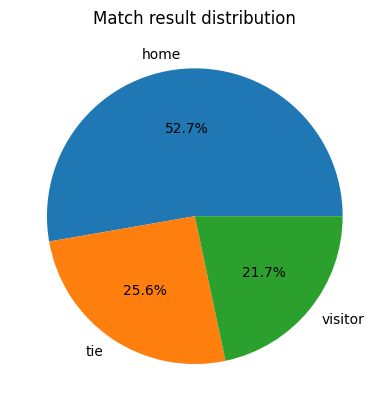

In [6]:
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title("Match result distribution")
plt.show()

2. What are the top ten scoring teams of all time? What are the ten teams that concede the most? Make two bar plot charts showing each of them. Consider only matches played in 1st division.
What have been the biggest wins? Of course, when we say biggest we mean
those with the highest goal difference. Show the top ten of them in a table.

In [7]:
df1 = df.loc[df["division"] == 1].dropna(subset=["score"])
df1

,season,division,matchday,date,time,home_team,away_team,score,result,goals_home,goals_visitor
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,visitor,2,3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,home,3,2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,home,5,0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,tie,1,1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,visitor,0,2
...,...,...,...,...,...,...,...,...,...,...,...
47963,2021-2022,1,3,8/28/21,10:00 PM,Real Betis,Real Madrid,0:1,visitor,0,1
47964,2021-2022,1,3,8/29/21,5:00 PM,Barcelona,Getafe,2:1,home,2,1
47965,2021-2022,1,3,8/29/21,7:30 PM,Cádiz CF,CA Osasuna,2:3,visitor,2,3
47966,2021-2022,1,3,8/29/21,7:30 PM,Rayo Vallecano,Granada CF,4:0,home,4,0


In [8]:
df1["goals_home"] = df1["goals_home"].astype(int)
df1["goals_visitor"] = df1["goals_visitor"].astype(int)
df1

,season,division,matchday,date,time,home_team,away_team,score,result,goals_home,goals_visitor
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,visitor,2,3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,home,3,2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,home,5,0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,tie,1,1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,visitor,0,2
...,...,...,...,...,...,...,...,...,...,...,...
47963,2021-2022,1,3,8/28/21,10:00 PM,Real Betis,Real Madrid,0:1,visitor,0,1
47964,2021-2022,1,3,8/29/21,5:00 PM,Barcelona,Getafe,2:1,home,2,1
47965,2021-2022,1,3,8/29/21,7:30 PM,Cádiz CF,CA Osasuna,2:3,visitor,2,3
47966,2021-2022,1,3,8/29/21,7:30 PM,Rayo Vallecano,Granada CF,4:0,home,4,0


In [9]:
df2 = df1.groupby("home_team")
df3 = df1.groupby("away_team")

<BarContainer object of 10 artists>

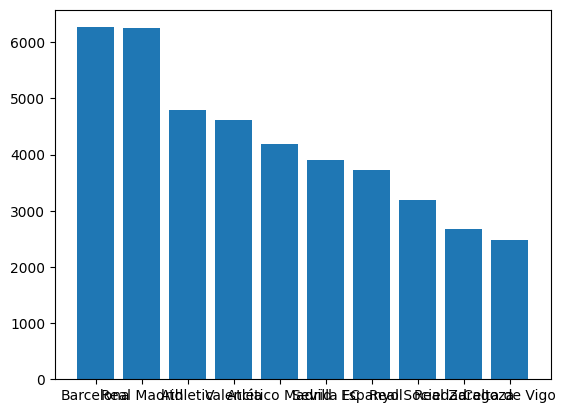

In [10]:
goals = df2["goals_home"].sum() + df3["goals_visitor"].sum()
total_goals = goals.sort_values(ascending = False).head(10)
plt.bar(total_goals.index, total_goals)

In [11]:
total_goals

home_team
Barcelona          6267
Real Madrid        6249
Athletic           4802
Valencia           4615
Atlético Madrid    4184
Sevilla FC         3903
Espanyol           3720
Real Sociedad      3200
Real Zaragoza      2683
Celta de Vigo      2483
dtype: int64

<BarContainer object of 10 artists>

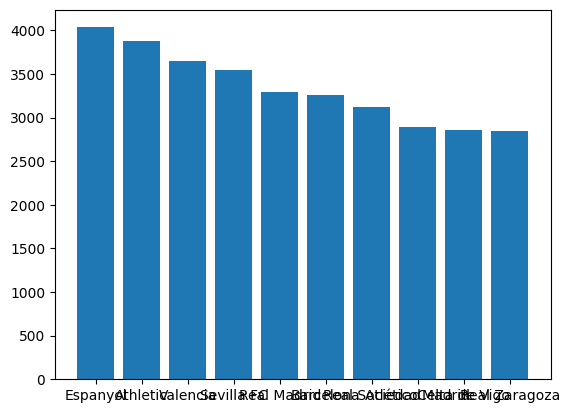

In [12]:
goals = df3["goals_home"].sum() + df2["goals_visitor"].sum()
conceded_goals = goals.sort_values(ascending = False).head(10)
plt.bar(conceded_goals.index, conceded_goals)

In [13]:
conceded_goals

away_team
Espanyol           4034
Athletic           3875
Valencia           3649
Sevilla FC         3546
Real Madrid        3287
Barcelona          3259
Real Sociedad      3126
Atlético Madrid    2894
Celta de Vigo      2856
Real Zaragoza      2847
dtype: int64

In [14]:
df1["difference"] = abs(df1["goals_home"] - df1["goals_visitor"])
df1.sort_values("difference", ascending=False).head(10)

,season,division,matchday,date,time,home_team,away_team,score,result,goals_home,goals_visitor,difference
225,1930-1931,1,10,2/8/31,None,Athletic,Barcelona,12:1,home,12,1,11
936,1940-1941,1,1,9/29/40,None,Sevilla FC,Barcelona,11:1,home,11,1,10
2787,1950-1951,1,11,11/19/50,None,Athletic,Lérida,10:0,home,10,0,10
1168,1941-1942,1,15,1/11/42,None,Athletic,Celta de Vigo,10:0,home,10,0,10
1071,1941-1942,1,1,9/28/41,None,Sevilla FC,Real Oviedo,10:0,home,10,0,10
3629,1953-1954,1,26,3/28/54,None,Barcelona,Real Oviedo,9:0,home,9,0,9
10024,1978-1979,1,16,1/14/79,None,Barcelona,Rayo Vallecano,9:0,home,9,0,9
408,1932-1933,1,10,1/29/33,None,Racing,Alavés,9:0,home,9,0,9
5027,1959-1960,1,21,2/7/60,None,Real Madrid,Elche CF,11:2,visitor,11,2,9
3911,1955-1956,1,1,9/11/55,None,Atlético Madrid,Hércules CF,9:0,home,9,0,9


In [15]:
df

,season,division,matchday,date,time,home_team,away_team,score,result,goals_home,goals_visitor
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,visitor,2,3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,home,3,2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,home,5,0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,tie,1,1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,visitor,0,2
...,...,...,...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,None,Real Oviedo,UD Ibiza,None,None,None,None
48776,2021-2022,2,42,5/29/22,None,Real Sociedad B,Real Zaragoza,None,None,None,None
48777,2021-2022,2,42,5/29/22,None,Sporting Gijón,UD Las Palmas,None,None,None,None
48778,2021-2022,2,42,5/29/22,None,CD Tenerife,FC Cartagena,None,None,None,None


3. There has been a lot of discussion about how LaLiga’s television rights have changed game schedules in the last years. Make a bar plot chart showing the number of matches played each weekday, and make also a histogram
of match time. Compare this two graphics between seasons 2000-2001 and 2020-2021.

In [16]:
df["date"] = pd.to_datetime(df["date"], format = "%m/%d/%y")
df["time"] = pd.to_datetime(df["time"], format = "%I:%M %p", errors = "coerce").dt.strftime("%H:%M")

In [17]:
weekday_counts = df["date"].dt.day_name().value_counts()
hour_counts = df["time"].dropna().value_counts()

<BarContainer object of 7 artists>

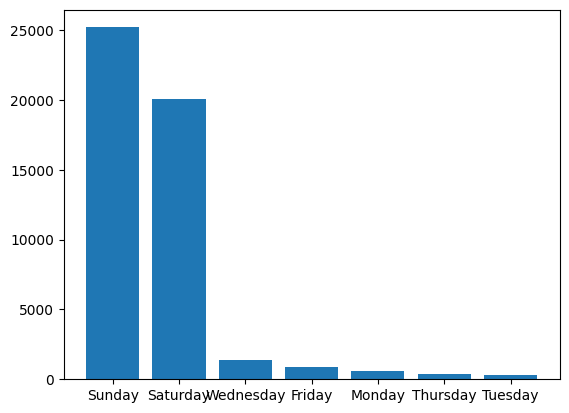

In [18]:
plt.bar(weekday_counts.index, weekday_counts)

<BarContainer object of 43 artists>

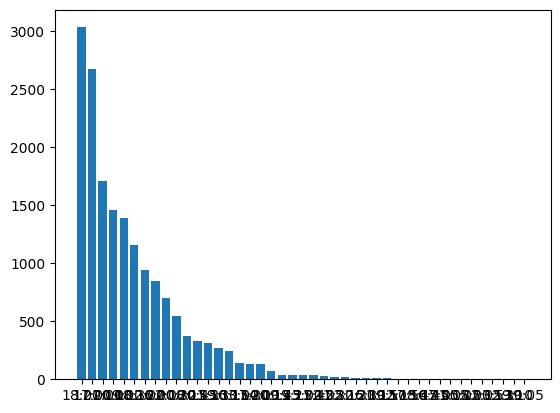

In [19]:
plt.bar(hour_counts.index, hour_counts)

<BarContainer object of 6 artists>

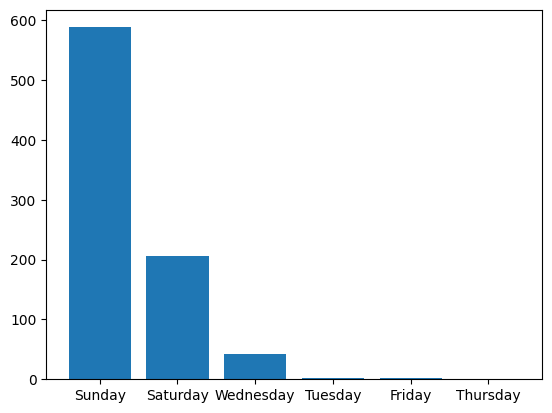

In [20]:
weekday_counts = df.loc[df["season"] == "2000-2001", "date"].dt.day_name().value_counts()
plt.bar(weekday_counts.index, weekday_counts)

<BarContainer object of 7 artists>

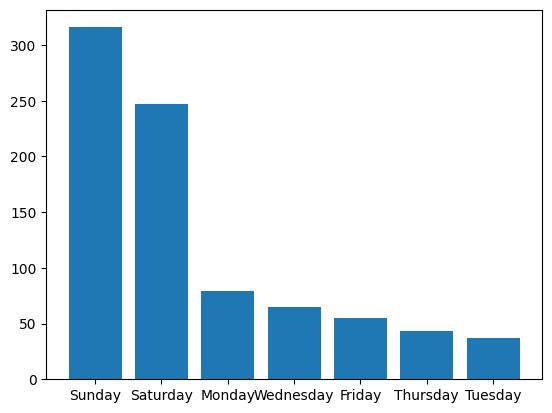

In [21]:
weekday_counts = df.loc[df["season"] == "2020-2021", "date"].dt.day_name().value_counts()
plt.bar(weekday_counts.index, weekday_counts)

hour_counts = df.loc[df["season"] == "2020-2021", "time"].dropna().value_counts()
plt.bar(hour_counts.index, hour_counts)

<BarContainer object of 13 artists>

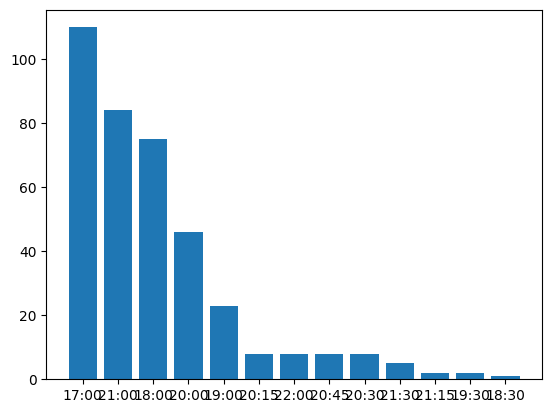

In [22]:
hour_counts = df.loc[df["season"] == "2000-2001", "time"].dropna().value_counts()
plt.bar(hour_counts.index, hour_counts)

4. Build a cross results table for season 2020-2021 (1st division). Figure 1 is an example taken from Wikipedia. Try to make it the most similar to this one, painting the background of each cell according to result (green in case local team wins and red in case visitor team wins). Also, could you model the intensity of this background color with the goal difference from the match?

In [23]:
df1_2020_2021 = df1.loc[df1["season"] == "2020-2021"]
df1_2020_2021

,season,division,matchday,date,time,home_team,away_team,score,result,goals_home,goals_visitor,difference
25438,2020-2021,1,1,9/12/20,4:00 PM,SD Eibar,Celta de Vigo,0:0,tie,0,0,0
25439,2020-2021,1,1,9/12/20,6:30 PM,Granada CF,Athletic,2:0,home,2,0,2
25440,2020-2021,1,1,9/12/20,9:00 PM,Cádiz CF,CA Osasuna,0:2,visitor,0,2,2
25441,2020-2021,1,1,9/13/20,2:00 PM,Alavés,Real Betis,0:1,visitor,0,1,1
25442,2020-2021,1,1,9/13/20,4:00 PM,Real Valladolid,Real Sociedad,1:1,tie,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25813,2020-2021,1,38,5/22/21,6:00 PM,CA Osasuna,Real Sociedad,0:1,visitor,0,1,1
25814,2020-2021,1,38,5/22/21,6:00 PM,Real Madrid,Villarreal,2:1,home,2,1,1
25815,2020-2021,1,38,5/22/21,6:00 PM,Real Valladolid,Atlético Madrid,1:2,visitor,1,2,1
25816,2020-2021,1,38,5/23/21,6:30 PM,Granada CF,Getafe,0:0,tie,0,0,0


In [26]:
crosstab = pd.crosstab(index = df1_2020_2021["home_team"], columns = df1_2020_2021["away_team"], 
                       values = df1_2020_2021["score"].str.replace(":", "-"),
                       aggfunc = lambda x: " ".join(x)).fillna("--")
crosstab

away_team,Alavés,Athletic,Atlético Madrid,Barcelona,CA Osasuna,Celta de Vigo,Cádiz CF,Elche CF,Getafe,Granada CF,Levante,Real Betis,Real Madrid,Real Sociedad,Real Valladolid,SD Eibar,SD Huesca,Sevilla FC,Valencia,Villarreal
home_team,,,,,,,,,,,,,,,,,,,,
Alavés,--,1-0,1-2,1-1,0-1,1-3,1-1,0-2,0-0,4-2,2-2,0-1,1-4,0-0,1-0,2-1,1-0,1-2,2-2,2-1
Athletic,0-0,--,2-1,2-3,2-2,0-2,0-1,1-0,5-1,2-1,2-0,4-0,0-1,0-1,2-2,1-1,2-0,2-1,1-1,1-1
Atlético Madrid,1-0,2-1,--,1-0,2-1,2-2,4-0,3-1,1-0,6-1,0-2,2-0,1-1,2-1,2-0,5-0,2-0,2-0,3-1,0-0
Barcelona,5-1,2-1,0-0,--,4-0,1-2,1-1,3-0,5-2,1-2,1-0,5-2,1-3,2-1,1-0,1-1,4-1,1-1,2-2,4-0
CA Osasuna,1-1,1-0,1-3,0-2,--,2-0,3-2,2-0,0-0,3-1,1-3,0-2,0-0,0-1,0-0,2-1,1-1,0-2,3-1,1-3
Celta de Vigo,2-0,0-0,0-2,0-3,2-1,--,4-0,3-1,1-0,3-1,2-0,2-3,1-3,1-4,1-1,1-1,2-1,3-4,2-1,0-4
Cádiz CF,3-1,0-4,2-4,2-1,0-2,0-0,--,1-3,0-2,1-1,2-2,0-1,0-3,0-1,0-0,1-0,2-1,1-3,2-1,0-0
Elche CF,0-2,2-0,0-1,0-2,2-2,1-1,1-1,--,1-3,0-1,1-0,1-1,1-1,0-3,1-1,1-0,0-0,2-1,2-1,2-2
Getafe,0-0,1-1,0-0,1-0,1-0,1-1,0-1,1-1,--,0-1,2-1,3-0,0-0,0-1,0-1,0-1,1-0,0-1,3-0,1-3


In [27]:
def color_cells(value):
    if value != '--':
        home_score, away_score = map(int, value.split('-'))
        if home_score > away_score:
            return 'background-color: lightgreen'
        elif home_score < away_score:
            return 'background-color: salmon'
        else:
            return 'background-color: yellow'
    return ''

In [30]:
styled_crosstab = crosstab.style.applymap(color_cells)
styled_crosstab

/tmp/ipykernel_2402/709934697.py:1: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_crosstab = crosstab.style.applymap(color_cells)


away_team,Alavés,Athletic,Atlético Madrid,Barcelona,CA Osasuna,Celta de Vigo,Cádiz CF,Elche CF,Getafe,Granada CF,Levante,Real Betis,Real Madrid,Real Sociedad,Real Valladolid,SD Eibar,SD Huesca,Sevilla FC,Valencia,Villarreal
home_team,,,,,,,,,,,,,,,,,,,,
Alavés,--,1-0,1-2,1-1,0-1,1-3,1-1,0-2,0-0,4-2,2-2,0-1,1-4,0-0,1-0,2-1,1-0,1-2,2-2,2-1
Athletic,0-0,--,2-1,2-3,2-2,0-2,0-1,1-0,5-1,2-1,2-0,4-0,0-1,0-1,2-2,1-1,2-0,2-1,1-1,1-1
Atlético Madrid,1-0,2-1,--,1-0,2-1,2-2,4-0,3-1,1-0,6-1,0-2,2-0,1-1,2-1,2-0,5-0,2-0,2-0,3-1,0-0
Barcelona,5-1,2-1,0-0,--,4-0,1-2,1-1,3-0,5-2,1-2,1-0,5-2,1-3,2-1,1-0,1-1,4-1,1-1,2-2,4-0
CA Osasuna,1-1,1-0,1-3,0-2,--,2-0,3-2,2-0,0-0,3-1,1-3,0-2,0-0,0-1,0-0,2-1,1-1,0-2,3-1,1-3
Celta de Vigo,2-0,0-0,0-2,0-3,2-1,--,4-0,3-1,1-0,3-1,2-0,2-3,1-3,1-4,1-1,1-1,2-1,3-4,2-1,0-4
Cádiz CF,3-1,0-4,2-4,2-1,0-2,0-0,--,1-3,0-2,1-1,2-2,0-1,0-3,0-1,0-0,1-0,2-1,1-3,2-1,0-0
Elche CF,0-2,2-0,0-1,0-2,2-2,1-1,1-1,--,1-3,0-1,1-0,1-1,1-1,0-3,1-1,1-0,0-0,2-1,2-1,2-2
Getafe,0-0,1-1,0-0,1-0,1-0,1-1,0-1,1-1,--,0-1,2-1,3-0,0-0,0-1,0-1,0-1,1-0,0-1,3-0,1-3


In [31]:
#FUNCIÓN:

def plot_cross_results_table(season, division):
    dff = df.loc[(df["division"] == division) & (df["season"] == season)]
    crosstab = pd.crosstab(index = dff["home_team"], columns = dff["away_team"], values = dff["score"].str.replace(":", "-"), 
                       aggfunc = lambda x: " ".join(x)).fillna("--")
    styled_crosstab = crosstab.style.applymap(color_cells) 
    return styled_crosstab
    
plot_cross_results_table("2020-2021", 2)

/tmp/ipykernel_2402/3708494293.py:7: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_crosstab = crosstab.style.applymap(color_cells)


away_team,Albacete,Alcorcón,CD Castellón,CD Leganés,CD Lugo,CD Mirandés,CD Tenerife,CE Sabadell,CF Fuenlabrada,Espanyol,FC Cartagena,Girona,Málaga CF,Ponferradina,RCD Mallorca,Rayo Vallecano,Real Oviedo,Real Zaragoza,Sporting Gijón,UD Almería,UD Las Palmas,UD Logroñés
home_team,,,,,,,,,,,,,,,,,,,,,,
Albacete,--,0-1,0-1,0-0,1-1,1-0,0-2,3-0,1-2,0-3,2-0,0-2,1-1,0-2,0-1,2-1,1-1,1-0,0-1,1-2,1-1,1-1
Alcorcón,1-2,--,2-1,1-2,1-0,4-0,2-0,2-0,0-3,1-0,2-1,1-0,0-1,0-1,0-2,0-3,1-1,0-3,1-2,0-1,0-0,1-0
CD Castellón,3-0,0-2,--,2-0,0-1,0-1,0-1,2-1,1-2,1-3,2-1,0-1,0-1,0-2,1-0,0-2,1-0,1-0,2-0,1-2,4-0,0-0
CD Leganés,3-1,1-0,0-0,--,3-2,1-0,1-0,2-1,0-2,2-0,3-1,0-1,1-0,1-1,0-1,1-0,2-1,1-0,0-0,2-1,1-0,3-0
CD Lugo,1-0,1-3,0-0,2-1,--,2-1,2-0,0-1,0-0,1-1,2-1,3-0,0-1,1-0,0-1,1-0,0-0,2-2,0-0,0-2,1-1,1-1
CD Mirandés,0-2,0-0,1-1,0-0,0-0,--,0-0,0-2,2-1,2-2,4-1,3-3,1-0,0-1,0-0,0-2,1-1,1-0,1-0,1-1,2-0,0-1
CD Tenerife,2-0,3-1,1-1,0-0,1-1,1-2,--,1-2,1-1,0-0,3-0,2-0,2-0,1-0,0-1,1-0,2-2,1-0,1-0,0-1,1-1,0-1
CE Sabadell,0-0,1-1,1-1,1-0,1-1,0-2,0-2,--,1-2,0-1,1-1,2-2,1-2,2-0,1-0,2-0,0-1,1-1,1-1,1-2,3-1,0-0
CF Fuenlabrada,1-0,0-0,1-1,0-0,2-0,0-1,1-1,2-2,--,1-1,2-1,1-1,0-2,1-1,4-1,1-2,2-2,0-1,0-0,1-1,1-2,0-0


5. As you surely know, there has always been a historical rivalry between Barcelona and Real Madrid. But which of them has won the most games in direct confrontations? Which of them has scored the most goals in these games? Show both things in two pie charts, side by side Remember to consider ties in the first one.

Write a function that, given two team names, plots the two graphs described above. Function prototype should be like plot_direct_confrontations_stats(team1, team2) and return the plot object. Use it with some other classical rivals like Betis and Sevilla.

In [ ]:
df_RMA_FCB = df[(df['home_team'].isin(['Real Madrid', 'Barcelona'])) & (df['away_team'].isin(['Real Madrid', 'Barcelona']))]
df_RMA_FCB = df_RMA_FCB.dropna(subset=['score'])
df_RMA_FCB